# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The Tmdb movie dataset contains movies gotten from The Movie Database
### Dataset Description 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Question(s) for Analysis
<ul>
    <li>
        <b>Research Question 1: How does Popularity of a movie and its Budget affect the revenue a movie generates?</b>
        <ul><li>Question 1a:Is there a correlation between the budget of the movie and the revenue it generates</li>
            <li>Question 1b:Is there a correlation between how popular a movie is and the revenue it generates</li>
            </ul>
    </li>
    <li>
        <b>Research Question 2: Which Month has the highest number of movies released across all years in the dataset?</b>
    </li>
    <li>
        <b>Research Question 3: Across all years which genre of movies has the highest count of movies released?</b>
    </li>
    <li>
        <b>Research Question 4: Is there an increase or decline in the volume of movies releases across all years?</b>
    </li>
</ul>

<h4>Importing Libraries</h4>

In [31]:
# importing all neccessary package
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use ('ggplot')
from matplotlib.pyplot import figure
mp.rcParams['figure.figsize'] = (12,8)

<a id='wrangling'></a>
## Data Wrangling




<p>Loading the movie dataset into jupyter notebook and showing the first 5 rows</p>

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
data = pd.read_csv(r"C:\Users\user\Downloads\tmdb-movies.csv")
data.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#checking the shape of my dataset
data.shape

(10866, 21)

looking at the shape of my dataset, i can see that it contains 10,866 rows and 21 columns

In [4]:
#checking the statistcal distribution of my dataset
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
#checking the datatypes of each respective column in the dataset
data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
#check for the totla null values per column in my dataset
data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
#printing out how many duplicated rows are contained in the dataset
print(data.duplicated().sum())

1



### Data Cleaning
 

<h3><b>Data cleaning steps</b></h3>
<p>Based on my ealier defined questions and after checking the datasets rows and columns I will be performing the following to further clean and trim the dataset to only reflect only relevant datas that is usefrul in answering my defined questions</p>
<ul>
    <li>
        I will be removing columns not relevant to answering my questions and also columns that have very high amount of null values
    </li>
    <li>
        I will be dropping Null values
    </li>
    <li>
        I will be dropping duplicate values
    </li>
    <li>
        I wil be changing the datatype of some columns
    </li>
</ul>

### Removing Unused Columns

In [9]:
#creating a list of all the columns i will be removing from my datset
drop_columns = ['imdb_id','cast', 'homepage','director','tagline',
                'keywords','overview','production_companies']

In [10]:
#dropping the columns and assigning my dataframe to a new variable
df= data.drop(drop_columns, axis=1)

In [11]:
#checking my dataset to see if the columns has been dropped
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
#checking the new shape of my new dataset
df.shape

(10866, 13)

My new datset has 10866 rows same as the original but now I'm left with 13 columns

### Dropping Null values

<p>Rechecking the null values i have in my newly created dataframe after dropping the columns i will not be using</p>

In [13]:
#checking null values
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

<p>I can see that I have only 23 null values in my new dataset and its from the genres' column, I will be drooping the null values apart from the values been insignificant to affect the distribution of my datset, I can't accurately say any genre pertaining to the movie if i were to search online is the accurate genre combination information of the movies.</p>

In [14]:
#droping null values
df.dropna(inplace=True)

In [15]:
#rechecking the null values to be sure it has been dropped
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

### Dropping duplicates data

In [16]:
#checking for duplicates
df.duplicated().sum()

1

In [17]:
#dropping duplicated data
df.drop_duplicates(inplace=True)

In [18]:
#checking to make sure duplicates has been dropped
df.duplicated().sum()

0

### Changing the datatype

In [19]:
df.dtypes

id                  int64
popularity        float64
budget              int64
revenue             int64
original_title     object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

<p>I will be changing the datatype of the release_date column as I will like to extract the month each movies in the datset was released so I can use to answer one of my questions</p>

In [20]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [21]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,65870.675521,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,91981.355752,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10589.250000,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20557.000000,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75186.000000,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Looking at the statistical information about my dataset above, I observed that the following columns budget, revenue, runtime, budget_adj, revenue_adj have minimum values reflecting 0.00000 and 25th quantile and 50th quanntile also showing 0.000000.
Its actuall absured that this columns will be having zeros values, because a movie with no runtime is no movie, likewise if no funds was budgted to the production of a movie then there is nothing to call a movie hence it cant be produced.
This is in indicative that there are zeros in these columns, I will try to fix these replacing the zeros with nan, so that they will be ignored in my analysis.

In [22]:
#replacing the zeros with nan, using np.nan
#I'm using it on the entire dataframe. 
df= df.replace(0, np.nan)

In [23]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,10842.000000,5.168000e+03,4.849000e+03,10812.000000,10842.000000,10842.000000,10842.000000,5.168000e+03,4.849000e+03
mean,65870.675521,0.647461,3.074552e+07,8.923886e+07,102.421846,217.823649,5.974064,2001.314794,3.689620e+07,1.151009e+08
std,91981.355752,1.001032,3.890583e+07,1.620801e+08,30.871363,576.180993,0.934257,12.813617,4.196188e+07,1.988557e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10589.250000,0.208210,6.000000e+06,7.732325e+06,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046585e+07
50%,20557.000000,0.384532,1.700000e+07,3.185308e+07,99.000000,38.000000,6.000000,2006.000000,2.272271e+07,4.395666e+07
75%,75186.000000,0.715393,4.000000e+07,9.996575e+07,112.000000,146.000000,6.600000,2011.000000,5.008384e+07,1.316482e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The above description looks okay, as the zeros values for the ealier mentioned columns have been fixed

<a id='eda'></a>
## Exploratory Data Analysis





<h1>Research Question 1 <br>How does Popularity of a movie and its Budget affect the Revenue a movie generates?</h1>

<h2>Research Question 1(a)</h2>
<p><b>Is there a correlation between the budget of the movie and the revenue it generates</b></p>
<p><b>Its also worthy to check the relationship between the budget_adj and revenue_adj columns which shows the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.</b></p>

<p>Before checking for the relationship between budget, popularity and revenue, lets first look out how all this individual variables are distributed</p>

In [47]:
#creating a function to plot the histogram of all the individual variables
def hist_plt(x , title, bins):
        plot = plt.hist(x = x , bins = bins)
        x = x.replace("_", " ")
        plt.title(f'Distribution of {title}', fontsize = 14, weight = "bold")
        plt.xlabel(title, fontsize = 12, weight="bold")

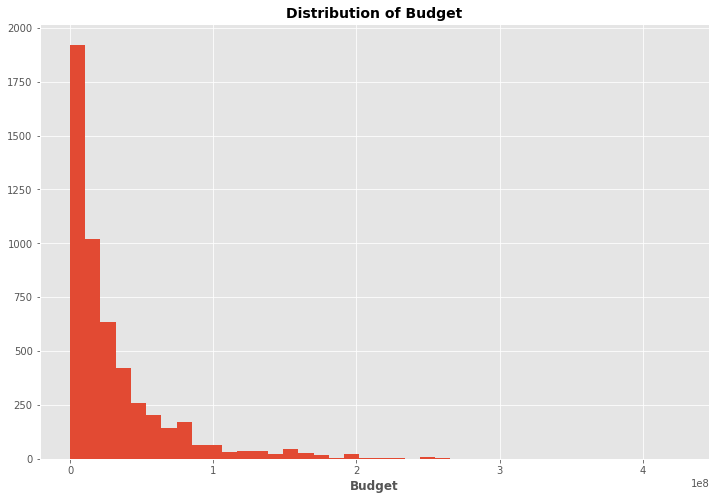

In [48]:
hist_plt(df['budget'], 'Budget', 40)

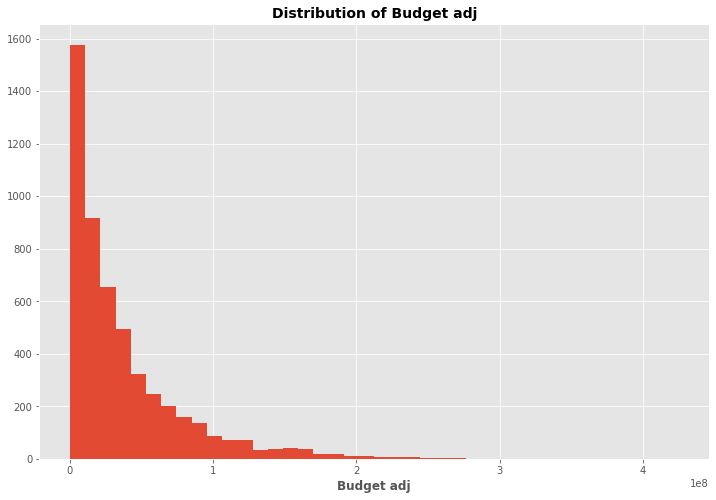

In [52]:
hist_plt(df['budget_adj'], 'Budget adj', 40)

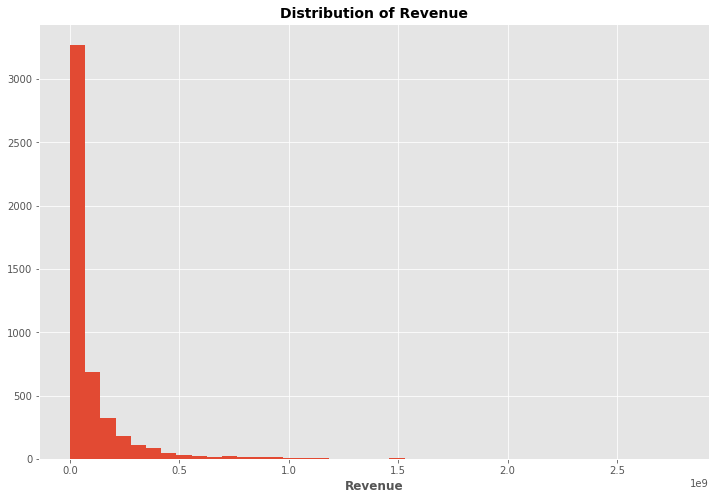

In [50]:
hist_plt(df['revenue'], 'Revenue', 40)

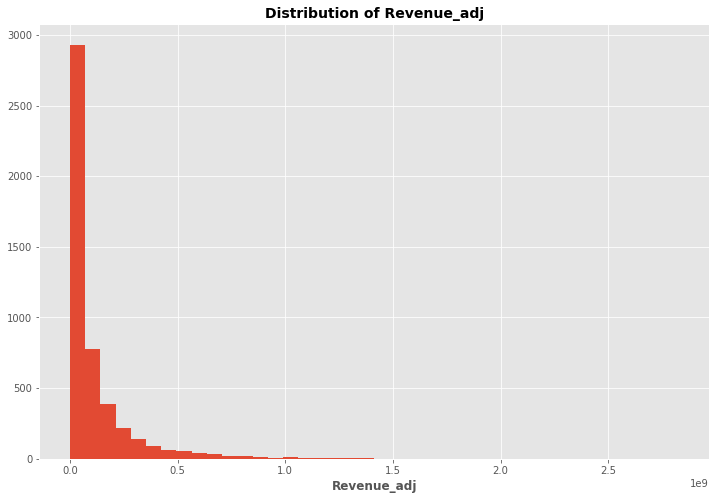

In [53]:
hist_plt(df['revenue_adj'], 'Revenue_adj', 40)

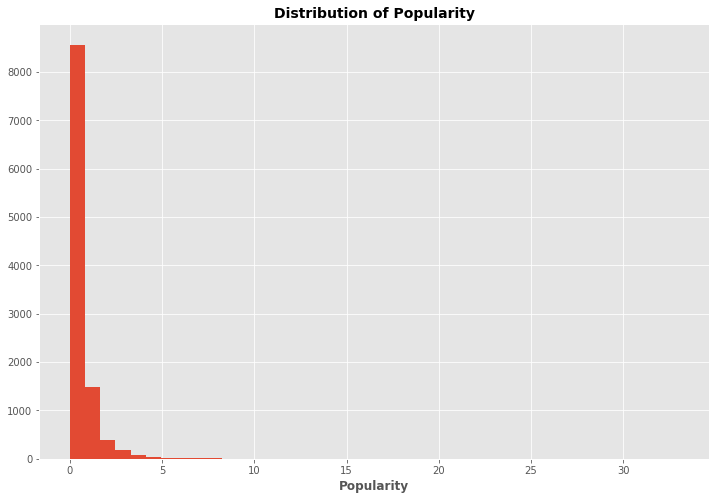

In [51]:
hist_plt(df['popularity'], 'Popularity', 40)

<b>Summary of all of the above plots:</b>
- The distribution of the both the budget and budget_adj(budget that accounts for inflation) are skewed to the right, although there is minor diffrences in their histogran distribution
- The distribution of the both the revenue and revenue_adj(revenue that accounts for inflation) are also skewed to the right, minor differences can also be seen in their distribution also.
- Distribution of the popularity column is also skewed to the left

<h2>Plotting a line of correlation for the plain budget and revenue columns </h2>

In [54]:
#creating a function for a regression plot to see the best line of fit 
#and check the correlation between variables
def reg_plt(x , y, data):
        plot = sns.regplot(x = x , y = y , data = df, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})
        x = x.replace("_", " ")
        y= y.replace("_", " ")
        plt.title(f'Relationship between {y} and {x}'.title(), fontsize = 14, weight = "bold")
        plt.xlabel(x.title(), fontsize = 10, weight="bold")
        plt.ylabel(y.title(), fontsize = 10, weight="bold")

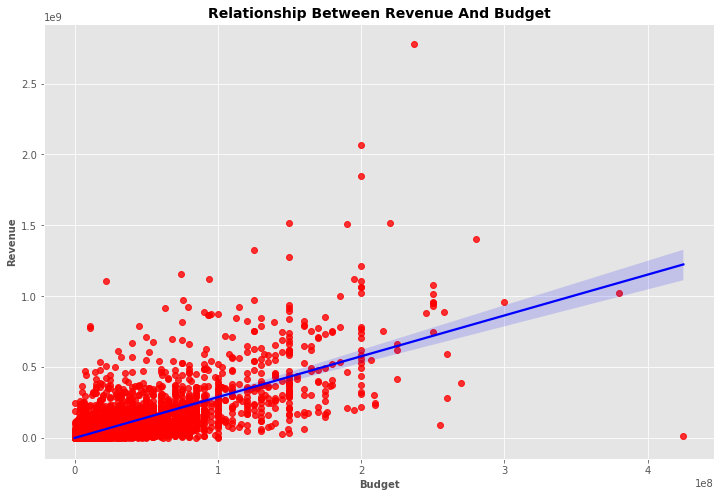

In [55]:
#resuing the regression plot function showcase the correlation between revenue and budget generated by a movie
reg_plt('budget','revenue',df)

Looking a the regression plot above, there is a positive correlation between the budget of a movie and the revenue it generates.
Movies that has high budget in its production tends to garner much revenue which could maybe be due to the fact the would be able to employ top rated actors and actress as its cast, also the movie graphics and its quality will be top notch and also there will be top money that will be spent in promotion of this movie before it was released. All this can casue the movie to be highly watched across all cinemas and which in turn cause the money it was able to generate to increase over time.

<h3>Plotting a line of correlation for the budget_adj and revenue_adj which accounts for inflation </h3>

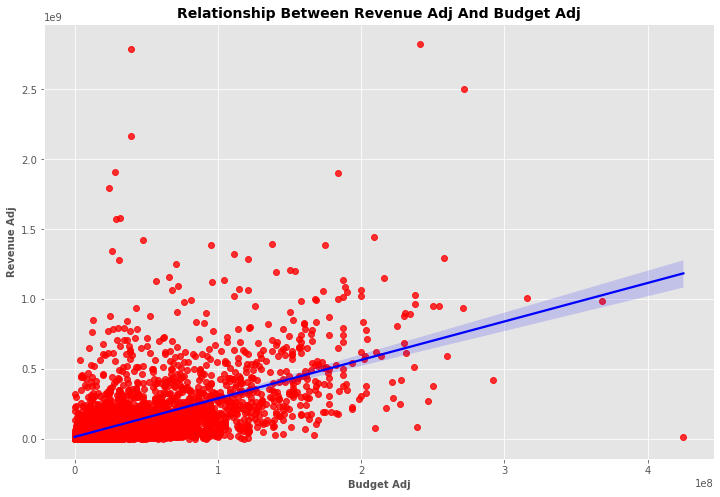

In [56]:
reg_plt('budget_adj','revenue_adj',df)

This also shows a positive correlation between the two but what is worth noting is the difference how the data points between the budget and revenue without inflation and the budget and revenue that has been adjusted for inlation. The way the points were scattered is clearly different between thw two whwn looking at the two plots

<h2>Research Question 1(b)</h2>
<p><b>Is there a correlation between how popular a movie is and the revenue it generates</b></p>

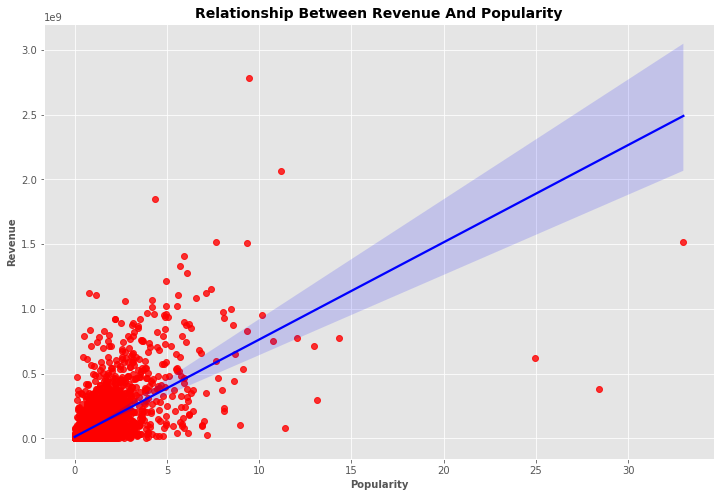

In [57]:
#resuing the regression plot function showcase the correlation between popularity and the revenue generated by a movie
reg_plt('popularity','revenue',df)

There is a correlation between the popularity of movie and its revenue, a movie that has more popularity scores tend to bring in more revenue 

<h2>Research Question 2</h2>
<p><b>Which Month has the highest number of movies released across all years in the dataset</b></p>

Extracting the month each movie was released from the release_date, which by default will cause the month to be extracted in a numerical format, also alongside, I'm also counting the total counts of movies for each month. The numerical month extracted will be default become the index, so i will aslo be sorting on this to arrange it an ascending order.

In [58]:
month_num = df['release_date'].dt.month.value_counts().sort_index()
month_num

1      916
2      687
3      821
4      797
5      808
6      826
7      798
8      916
9     1330
10    1148
11     814
12     981
Name: release_date, dtype: int64

In [59]:
#converting my series object into a pandas dataframe
month_mov = pd.DataFrame(month_num)
month_num

1      916
2      687
3      821
4      797
5      808
6      826
7      798
8      916
9     1330
10    1148
11     814
12     981
Name: release_date, dtype: int64

In [60]:
#renaming the column release_date to counts_movie
month_mov.rename(columns = {'release_date':'counts_movie'},inplace=True)

From the above i can see that the months are indexed from 1 - 12  with their corrresponding counts of movies released. I wil create a month list in words to map out each index with 1 representing the first month all the way down to the 12th month

In [61]:
#creating a list of all the months in a year
month = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [62]:
#adding the month list to my dataframe to create a new column
month_mov['month'] = month
month_mov

,counts_movie,month
1,916,Jan
2,687,Feb
3,821,Mar
4,797,Apr
5,808,May
6,826,Jun
7,798,Jul
8,916,Aug
9,1330,Sep
10,1148,Oct


In [63]:
#chaning the arrangement of my columns because i will like 
#the month column to be displayed first before the counts of movie
month_mov = month_mov.reindex(['month','counts_movie'], axis=1)
month_mov

,month,counts_movie
1,Jan,916
2,Feb,687
3,Mar,821
4,Apr,797
5,May,808
6,Jun,826
7,Jul,798
8,Aug,916
9,Sep,1330
10,Oct,1148


In [64]:
#checking the Top 6 largest value of movies released per month
month_mov['counts_movie'].nlargest(n=6) 

9     1330
10    1148
12     981
1      916
8      916
6      826
Name: counts_movie, dtype: int64

In [65]:
#checking the Top 6 smallest value of movies released per month
month_mov['counts_movie'].nsmallest(n=6) 

2     687
4     797
7     798
5     808
11    814
3     821
Name: counts_movie, dtype: int64

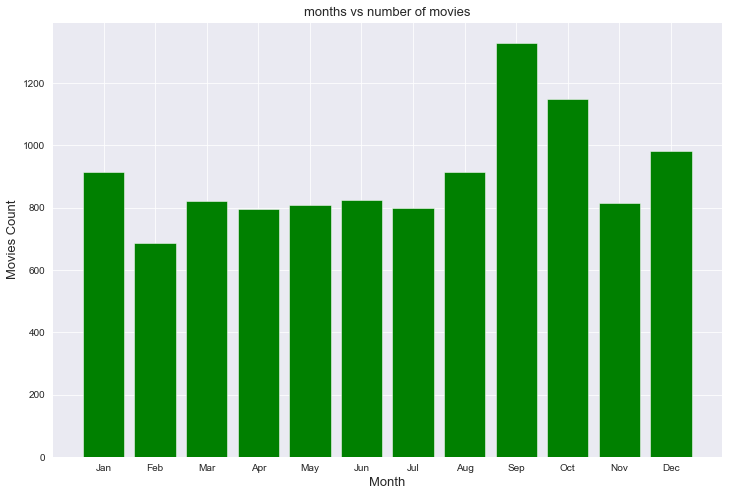

In [66]:
sns.set_style('darkgrid')
plt.bar('month','counts_movie', color = 'green', data = month_mov)
plt.title('months vs number of movies', fontsize= 13)
plt.xlabel('Month', fontsize= 13)
plt.ylabel('Movies Count', fontsize= 13)
plt.show()

From the Plot, septermber has the highest number of movies released, februrary has the lowest, dividing the all the months into equal half the first 6 months [jan, feb, mar, apr, may, jun] tend to have a low volume of movies been released compared to the last six month [jul, aug, sept, oct, nov, dec]

<h2>Research Question 3</h2>
<p><b>Across all years which genre of movies has the highest volume of movies released</b></p>

In [67]:
#make a function will will split the string and return the count of each genre.
def split_count(x):
    #concatenate all the rows of the genrs.
    val_concat = df[x].str.cat(sep = '|')
    split_count = pd.Series(val_concat.split('|'))
    #counts each of the genre and return.
    counts = split_count.value_counts(ascending=False)
    return counts

In [69]:
movies_genres = split_count('genres')

In [70]:
movies_genres= pd.DataFrame(movies_genres)
movies_genres.head(5)

,0
Drama,4760
Comedy,3793
Thriller,2907
Action,2384
Romance,1712


In [77]:
#renaming the column
movies_genres.rename(columns = {0 :'total movies'},inplace=True)
movies_genres.head(5)

,total movies
Drama,4760
Comedy,3793
Thriller,2907
Action,2384
Romance,1712


In [72]:
#checking the Top 6 largest value of genres
movies_genres['total movies'].nlargest(n=6) 

Drama       4760
Comedy      3793
Thriller    2907
Action      2384
Romance     1712
Horror      1637
Name: total movies, dtype: int64

In [73]:
#checking the Bottom 6 largest value of genres
movies_genres['total movies'].nsmallest(n=6) 

Western     165
TV Movie    167
Foreign     188
War         270
History     334
Music       408
Name: total movies, dtype: int64

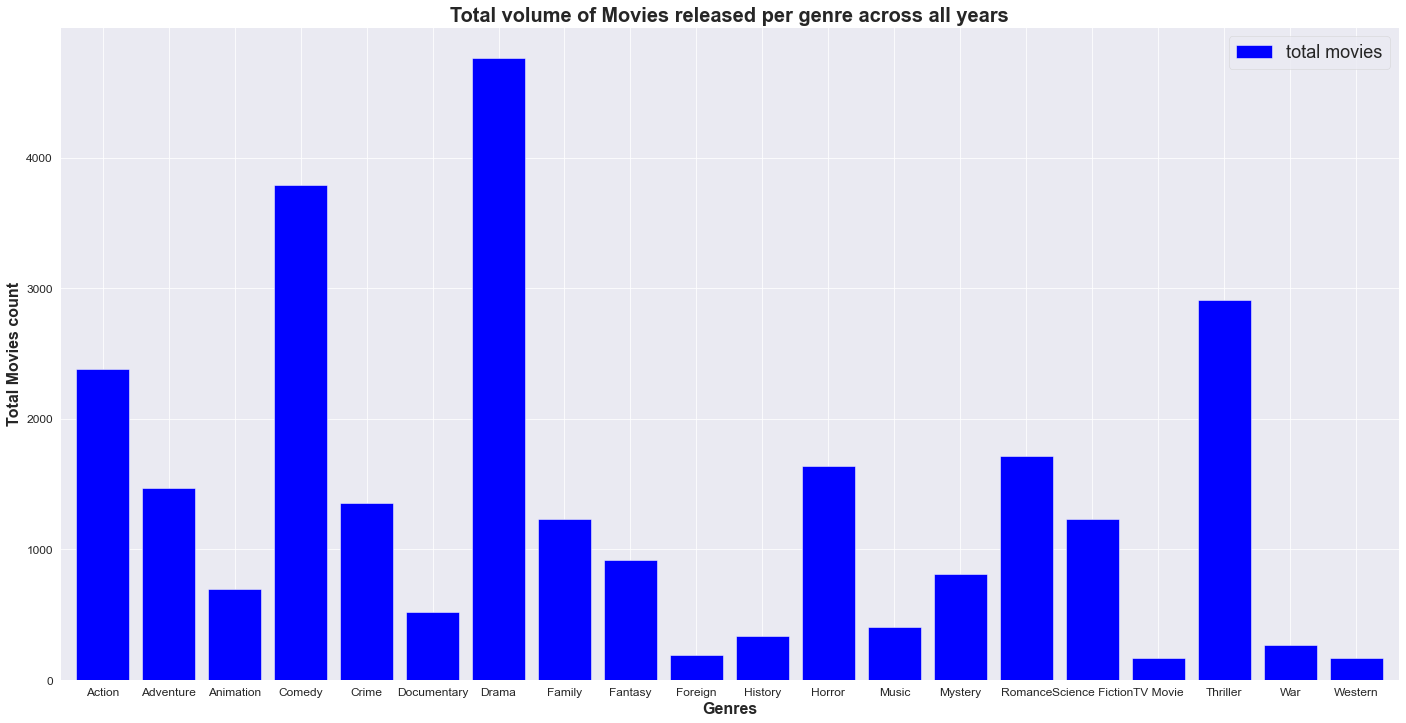

In [89]:
sns.set_style('darkgrid')
movies_genres.sort_index().plot(kind= 'bar',figsize = (24,12),width = 0.8, fontsize=12, rot = 0, color = 'blue')
plt.title('Total volume of Movies released per genre across all years', fontsize= 20, weight= 'bold')
plt.xlabel('Genres', fontsize= 16, weight = 'bold')
plt.ylabel('Total Movies count', fontsize= 16, weight = 'bold')
plt.legend(fontsize = 18)
plt.show()

Drama , Comedy and Thriller are the top three genres of movies that have been released so far across all the years in this dataset, while western, TV Movie and Foreign are the least three movies genres released.

<h2>Research Question 4</h2>
<p><b>Is there an increase or decline in the volume of movies releases across all years?</b></p><br>
<p><b>Which year has the highest volume of movies released and which year has the lowest values?</b></p>

In [90]:
#counting the total number of movies in per year
yr_count=df.groupby('release_year').count()['id']

In [91]:
yr_count.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

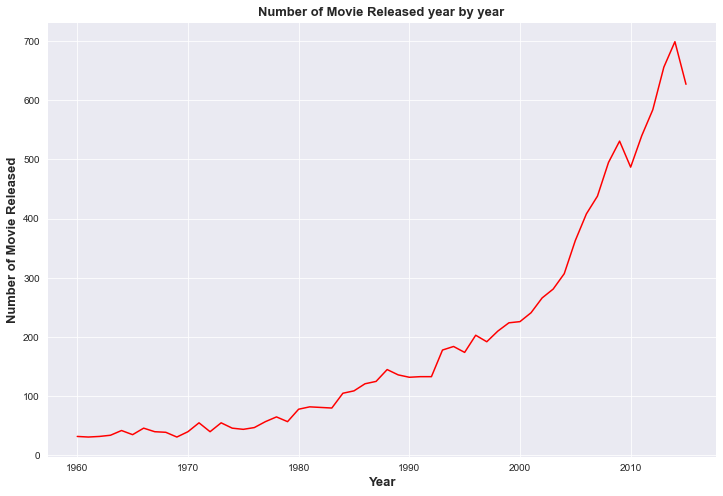

In [92]:
sns.set_style('darkgrid')
yr_count.plot(color = 'red')
#set title and labels
plt.title('Number of Movie Released year by year', fontsize= 13, weight = "bold")
plt.xlabel('Year', fontsize= 13, weight = "bold")
plt.ylabel('Number of Movie Released', fontsize= 13, weight = "bold");

The chart shows an increase in the total volume of movies released across all year, there is an upward trend. This likely to continue this way.

In [93]:
#creating a dataframe from yr_count series object
yr_count_df= pd.DataFrame(yr_count)
yr_count_df.head()

,id
release_year,
1960,32
1961,31
1962,32
1963,34
1964,42


In [94]:
#renaming the column
yr_count_df.rename(columns = {'id' :'total movies'},inplace=True)
yr_count_df.head(5)

,total movies
release_year,
1960,32
1961,31
1962,32
1963,34
1964,42


In [95]:
#checking the top 6 month with largest volume movies released
yr_count_df['total movies'].nlargest(n=6) 

release_year
2014    699
2013    656
2015    627
2012    584
2011    540
2009    531
Name: total movies, dtype: int64

In [96]:
#checking the top 6 month with smallest volume movies released
yr_count_df['total movies'].nsmallest(n=6) 

release_year
1961    31
1969    31
1960    32
1962    32
1963    34
1965    35
Name: total movies, dtype: int64

<a id='conclusions'></a>
<h1>Conclusions</h1>

<h3>Question 1: (checking the effect of popularity and budget on the reveneue a movie generates)</h3><br>
The more budget that was allocated to a movie corresponds to an higher rate of revenue generated.
Higher budget could infer, more top rated actors were casted in the movie and or more money was spend in the promoting this movie which inturns increase how popular a movie is and subsequently also cause an increase in the revenue generated.


<h3>Question 2: (Which Month has the highest number of movies released)</h3><br>
From the Plot, septermber has the highest number of movies released, februrary has the lowest, dividing the all the months into equal half the first 6 months [jan, feb, mar, apr, may, jun] tend to have a low volume of movies been released compared to the last six month [jul, aug, sept, oct, nov, dec] This is evident because when you look at the top 6 largest month with total movies released, September (1330), October (1148) and December ( 981) rank from 1st to 3rd respectively with februrary (687), April (797), July (798) ranking has the last 3. But checking the result for top 6 least movies produce per month, months from the first half of the year takes the largets percent out of it.



<h3>Question 3: (Which genre of movies has the highest volume of movies released)</h3><br>
Drama (4760) , Comedy (3793) and Thriller (2907) are the top three genres of movies that have been released so far across all the years in this dataset respectively, while western (165), TV Movie (167) and Foreign (188) are the least three movies genres released respectively.


<h3>Question 4: (4a-) Is there an increase or decline in the volume of movies releases across all years?<br>(4b) Which year has the highest volume of movies released and which year has the lowest values?</h3><br>
4a- There is an increase in volume of movies released across all the years, the plot shows and upward line trend
4b- The following years, 2014 (699) , 2013 (656) and 2015 (627) are the top three years where prdution of movies were at the highest, while 1961 (31), TV 1969 (31) and 1960 (32), 1962 (32) are the least years where by the production of movies was so low respectively. 
The upward trend in movie production could stem from the influence in advancement of technologies used in production of movies, which makes producing a movie in the past time consuming as compared to recent years where a movie production timeline could be as low as 3 months.




<h2><b>Limitations</b></h2>
The accuracy of the datatset from the the movie database could not be verified especially when it comes to budget cost and revenue generated as some movies costs in both areas could be higher than that. Another Limitation is the high null values in some of the columns expecially the prodution_companies columns over 1,000 rows contained empty values as it would have been good to see a relationship between the movies produced by a company with how popular the movie is or how much budget it generated.

<h1>Refrerences</h1><br>

<ul>
    <li>https://datascientyst.com/convert-month-number-to-month-name-pandas-dataframe/</li>
    <li>https://matplotlib.org/stable/tutorials/introductory/customizing.html</li>
    <li>https://www.dataquest.io/blog/how-to-plot-a-bar-graph-matplotlib/<li>
    <li>https://datatofish.com/line-chart-python-matplotlib/</li>
    <li>https://realpython.com/pandas-sort-python/#:~:text=start%20from%20zero.-,Sorting%20Your%20DataFrame%20on%20a%20Single%20Column,DataFrame%20sorted%20in%20ascending%20order.</li>
    <li>https://stackoverflow.com/questions/20461165/how-to-convert-index-of-a-pandas-dataframe-into-a-column</li>
    <li>https://www.adamsmith.haus/python/answers/how-to-convert-between-month-name-and-month-number-in-python</li>
    <li>https://www.w3resource.com/pandas/series/series-sort_index.php#:~:text=The%20sort_index()%20function%20is,original%20series%20and%20returns%20None.&text=Axis%20to%20direct%20sorting.,only%20be%200%20for%20Series.</li>
    <li>https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns#:~:text=You%20need%20to%20create%20a,columns%20in%20this%20new%20order.</li>
    <li>https://stackoverflow.com/questions/47462690/how-to-get-top-5-values-from-pandas-dataframe#:~:text=to%20get%20the%20top%205,many%20times%20they%20have%20appeared).</li>
    <li>https://stackoverflow.com/questions/12168648/pandas-python-how-to-add-column-to-dataframe-for-index</li>
    <li>.https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/</li>
    <li>https://www.w3schools.com/python/matplotlib_histograms.asp</li>
    <li>https://datatofish.com/plot-histogram-python/</li>
    <li>https://pythonguides.com/matplotlib-legend-font-size/<li>
</ul>